# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# One observation I made from WeatherPy was for the northern and southern hemisphere's latitude vs max temperature, 
# where it showed that the closer you get to the equator, the higher the max temperature

# Second observation I made was that latitude does not affect humidity, wind speed or cloudiness

# Third observation I made was that when city latitude was compared to max temperature on July 19th,2020
# where it shows that the further you are from the equator the lower the temperature is

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

        

In [5]:
#Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
print (query_url)

http://api.openweathermap.org/data/2.5/weather?appid=0d3006e7534da161b619203c2bb50645&q=ahipara


In [6]:
# Get weather data
response = requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 57},
 'cod': 200,
 'coord': {'lat': -35.17, 'lon': 173.17},
 'dt': 1595354865,
 'id': 2194098,
 'main': {'feels_like': 276.46,
          'grnd_level': 1000,
          'humidity': 78,
          'pressure': 1002,
          'sea_level': 1002,
          'temp': 283.94,
          'temp_max': 283.94,
          'temp_min': 283.94},
 'name': 'Ahipara',
 'rain': {'1h': 0.52},
 'sys': {'country': 'NZ', 'sunrise': 1595359769, 'sunset': 1595396262},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 244, 'speed': 9.72}}


In [15]:
#Create empty lists that will be used for DataFrame

city_new = []
lat_new = []
long_new = []
tempmax = []
humid = []
cloud = []
wind = []
country = []
date = []
count_record = 1
count_set = 1


for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
    
        city_new.append(response["name"])
        lat_new.append(response["coord"]["lat"])
        long_new.append(response["coord"]["lon"])
        tempmax.append((response["main"]["temp_max"]-273.15)*1.8+32)
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
    
    
        print(f"Processing Record {count_record} of Set {count_set} | {city}")
        count_record = count_record + 1
        if count_record == 51:
            count_set = count_set + 1 
            count_record = 1
        
    except(KeyError):
        print("'City not found. Skipping...'")



Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | salamiyah
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | yarada
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | kungurtug
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | amnat charoen
Processing Record 16 of Set 1 | hualmay
Processing Record 17 of Set 1 | tavira
Processing Record 18 of Set 1 | aripuana
Processing Record 19 of Set 1 | west helena
Processing Record 20 of Set 1 | santa cruz de la palma
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | albany
'City not found. Skipping...'
Processing Record 23 of Set 1 | vaini
Processing Record 24 o

Processing Record 37 of Set 4 | offa
Processing Record 38 of Set 4 | robe
Processing Record 39 of Set 4 | nanortalik
Processing Record 40 of Set 4 | portland
'City not found. Skipping...'
Processing Record 41 of Set 4 | kandi
Processing Record 42 of Set 4 | orumiyeh
Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | hilo
'City not found. Skipping...'
Processing Record 45 of Set 4 | nome
Processing Record 46 of Set 4 | sault sainte marie
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | lavrentiya
Processing Record 49 of Set 4 | necochea
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | goundam
Processing Record 3 of Set 5 | wanning
'City not found. Skipping...'
Processing Record 4 of Set 5 | arenapolis
Processing Record 5 of Set 5 | emerald
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | bairiki
Processing Record 8 of Set 5 | urusha
Processing Record 9 of 

Processing Record 26 of Set 8 | hearst
'City not found. Skipping...'
Processing Record 27 of Set 8 | morehead
Processing Record 28 of Set 8 | xichang
Processing Record 29 of Set 8 | high level
Processing Record 30 of Set 8 | mogadouro
Processing Record 31 of Set 8 | eyl
Processing Record 32 of Set 8 | muri
Processing Record 33 of Set 8 | pemba
Processing Record 34 of Set 8 | whitianga
'City not found. Skipping...'
'City not found. Skipping...'
Processing Record 35 of Set 8 | kota belud
'City not found. Skipping...'
Processing Record 36 of Set 8 | hirara
Processing Record 37 of Set 8 | san rafael
Processing Record 38 of Set 8 | vanimo
Processing Record 39 of Set 8 | maniitsoq
'City not found. Skipping...'
'City not found. Skipping...'
Processing Record 40 of Set 8 | taoudenni
Processing Record 41 of Set 8 | yelabuga
Processing Record 42 of Set 8 | pimentel
Processing Record 43 of Set 8 | burley
Processing Record 44 of Set 8 | homer
Processing Record 45 of Set 8 | saint andrews
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#create dataframe with lists made above


df_cityweather = pd.DataFrame({"City":city_new,
                               "Lat":lat_new,
                               "Lng":long_new,
                               "Max Temp":tempmax,
                               "Humidity":humid,
                               "Cloudiness":cloud,
                               "Wind Speed":wind,
                               "Country":country,
                               "Date":date})

df_cityweather.to_csv("weather.csv",index=False)

In [9]:
df_cityweather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,44.996,83,93,1.36,AU,1595354732
1,Hobart,-42.88,147.33,44.996,65,78,3.60,AU,1595354895
2,Atuona,-9.80,-139.03,79.340,75,26,7.72,PF,1595354964
3,Salamiyah,35.01,37.05,75.272,35,0,5.47,SY,1595355142
4,Chui,-33.70,-53.46,70.196,82,100,2.35,UY,1595354823
...,...,...,...,...,...,...,...,...,...
543,Shizunai-furukawachō,42.33,142.37,64.688,95,100,6.51,JP,1595355174
544,Onega,63.91,38.14,66.938,81,73,2.41,RU,1595354962
545,Moa,20.66,-74.94,85.712,70,75,6.03,CU,1595355175
546,Andenes,69.31,16.12,51.800,93,90,5.10,NO,1595355175


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
humidityhundred = df_cityweather[df_cityweather["Humidity"]>100]
humidityhundred.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Get the indices of cities that have humidity over 100%.
humidityhundred.index

Int64Index([  0,   4,   5,   6,   9,  10,  11,  13,  22,  24,
            ...
            522, 526, 528, 531, 532, 533, 543, 544, 546, 547],
           dtype='int64', length=177)

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.


#df.drop(df[df['Age'] < 25].index, inplace = True)
#Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

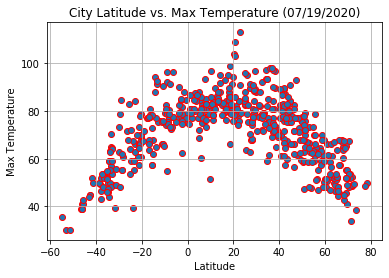

In [14]:
plt.scatter(df_cityweather["Lat"], df_cityweather["Max Temp"], edgecolor = "red")
plt.title("City Latitude vs. Max Temperature (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid("True")
plt.show()

## Latitude vs. Humidity Plot

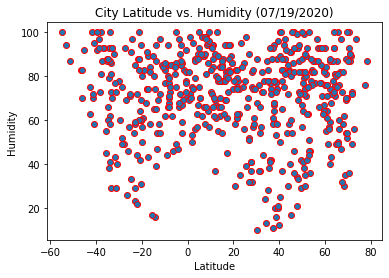

In [14]:
plt.scatter(df_cityweather["Lat"], df_cityweather["Humidity"], edgecolor = "red")
plt.title("City Latitude vs. Humidity (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid("True")
plt.show()

## Latitude vs. Cloudiness Plot

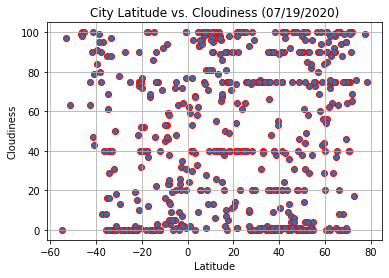

In [15]:
plt.scatter(df_cityweather["Lat"], df_cityweather["Cloudiness"], edgecolor = "red")
plt.title("City Latitude vs. Cloudiness (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid("True")
plt.show()

## Latitude vs. Wind Speed Plot

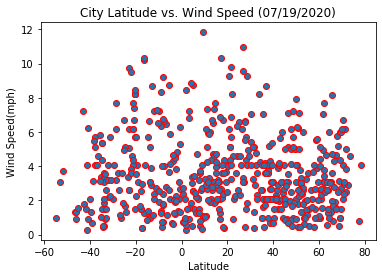

In [16]:
plt.scatter(df_cityweather["Lat"], df_cityweather["Wind Speed"], edgecolor = "red")
plt.title("City Latitude vs. Wind Speed (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots


In [29]:
# Create Northern and Southern Hemisphere DataFrames

ndf = df_cityweather[df_cityweather["Lat"]>=0]
ndf = ndf.reset_index(drop=True)


sdf = df_cityweather[df_cityweather["Lat"]<=0]
sdf = sdf.reset_index(drop=True)
sdf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yulara,-25.24,130.99,55.400,71,75,6.70,AU,1595219765
1,Rikitea,-23.12,-134.97,68.864,58,2,5.05,PF,1595219494
2,Busselton,-33.65,115.33,57.992,73,0,0.89,AU,1595219321
3,Punta Arenas,-53.15,-70.92,32.000,94,97,3.10,CL,1595219058
4,Constitución,-35.33,-72.42,51.836,87,16,3.35,CL,1595219766


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.66


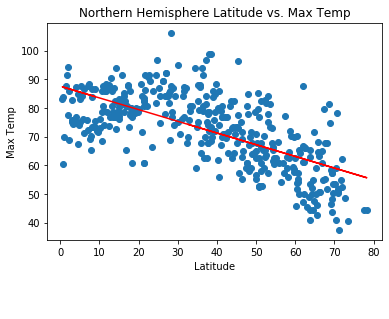

In [19]:
correlation = st.pearsonr(ndf["Lat"], ndf["Max Temp"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ndf["Lat"], ndf["Max Temp"])  
regress_values = ndf["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(ndf["Lat"], ndf["Max Temp"])
plt.plot(ndf["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
                                          


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.7


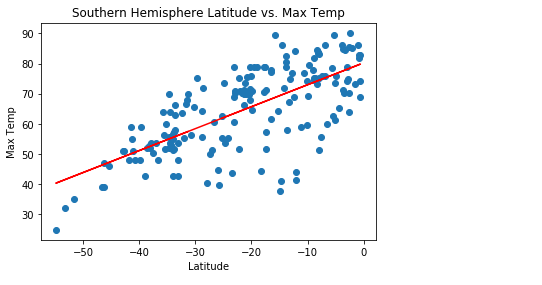

In [20]:
correlation = st.pearsonr(sdf["Lat"], sdf["Max Temp"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sdf["Lat"], sdf["Max Temp"])  
regress_values = sdf["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sdf["Lat"], sdf["Max Temp"])
plt.plot(sdf["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.title("Southern Hemisphere Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
         

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.07


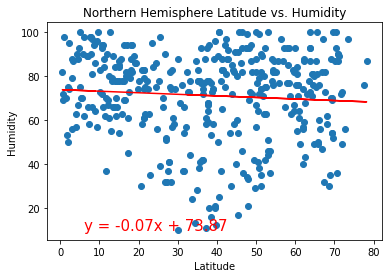

In [21]:
correlation = st.pearsonr(ndf["Lat"], ndf["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ndf["Lat"], ndf["Humidity"])  
regress_values = ndf["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(ndf["Lat"], ndf["Humidity"])
plt.plot(ndf["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.06


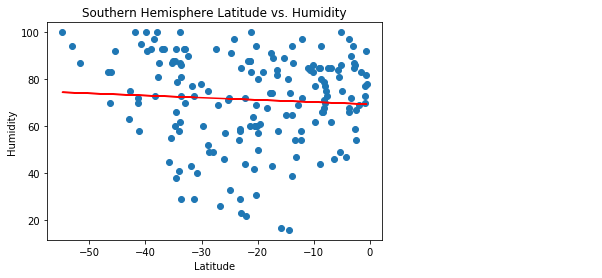

In [28]:
correlation = st.pearsonr(sdf["Lat"], sdf["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sdf["Lat"], sdf["Humidity"])  
regress_values = sdf["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sdf["Lat"], sdf["Humidity"])
plt.plot(sdf["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")


plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.02


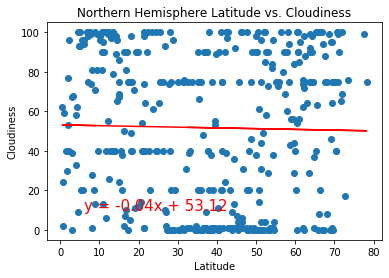

In [23]:
correlation = st.pearsonr(ndf["Lat"], ndf["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ndf["Lat"], ndf["Cloudiness"])  
regress_values = ndf["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(ndf["Lat"], ndf["Cloudiness"])
plt.plot(ndf["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")

plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.19


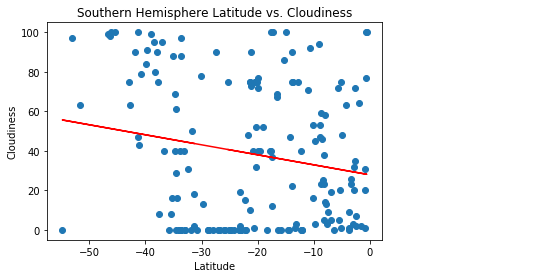

In [24]:
correlation = st.pearsonr(sdf["Lat"], sdf["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sdf["Lat"], sdf["Cloudiness"])  
regress_values = sdf["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sdf["Lat"], sdf["Cloudiness"])
plt.plot(sdf["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.1


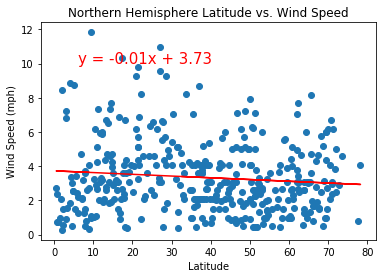

In [25]:
correlation = st.pearsonr(ndf["Lat"], ndf["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ndf["Lat"], ndf["Wind Speed"])  
regress_values = ndf["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(ndf["Lat"], ndf["Wind Speed"])
plt.plot(ndf["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.11


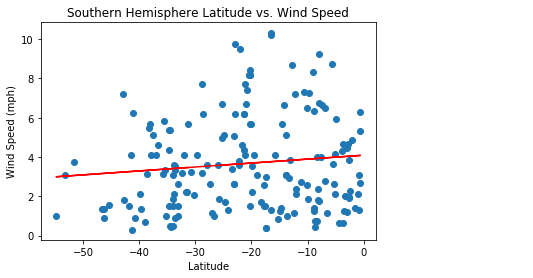

In [26]:
correlation = st.pearsonr(sdf["Lat"], sdf["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sdf["Lat"], sdf["Wind Speed"])  
regress_values = sdf["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sdf["Lat"], sdf["Wind Speed"])
plt.plot(sdf["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()